##### Prob 1.3
- Harmonic mean value의 Local Maxima를 구하기 위해서 2가지 단계를 적용하였다.
    - Threshold값보다 작은 Harmonic mean Value를 제외한다.
    - 5x5 patch를 따라 patch 내의 Harmonic mean value의 극대값을 찾고 나머지를 제외한다.  
    
    
- Prob 1.1에서 구현한 Harmonic Value중 값이 기준값 이상인 것을 제외하여 tmp matrix를 만들었다. tmp matrix의 전체 pixel을 5x5 patch의 중심점(3,3)으로 하여, patch 내의 값중 중심점의 값이 patch내의 최대값을 가질 때에 그 중심점에 해당하는 pixel의 값으로 1 을 주었다. 이때 patch가 tmp matrix의 범위를 벗어나는 경우에는 해당 픽셀을 0으로 처리(제로패딩을 적용)하였다.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
print("done")

done


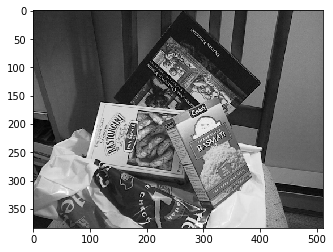

In [15]:
img = cv2.imread('scene.pgm',1)

row = img.shape[0]
col = img.shape[1]
filt_hor = np.array([[-1,1]])*.005
filt_ver = np.array([[-1],[1]])*.005
plt.imshow(img)

C:\Users\GUR\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


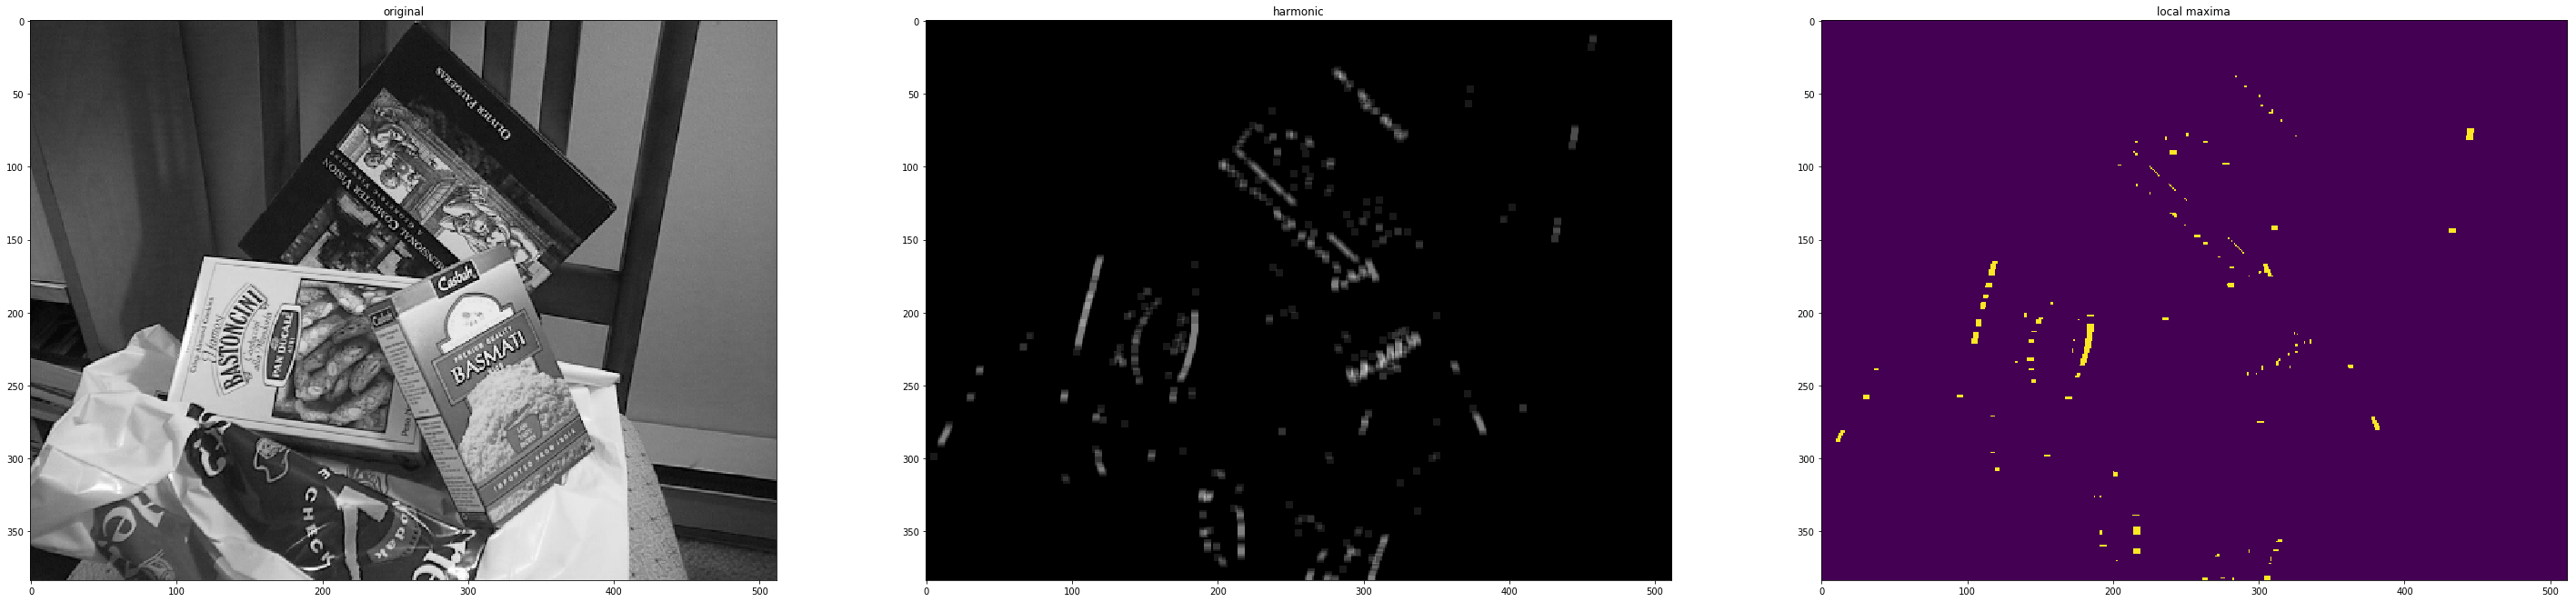

In [31]:
Ix = cv2.filter2D(img,-1,filt_hor)
Iy = cv2.filter2D(img,-1,filt_ver)
Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix*Iy
win = np.ones((5,5))

sum_Ix2 = cv2.filter2D(Ix2,-1,win)
sum_Iy2 = cv2.filter2D(Iy2,-1,win)
sum_Ixy = cv2.filter2D(Ixy,-1,win)

# for harmonic mean img
harmonic = np.zeros((row, col,3))
# img cut by threshold
tmp = np.zeros((row,col))
# for local maxima img
local = np.zeros((row,col))

threshold = 1

#harmonic mean img
for x in range(row):
    for y in range(col):
        h = np.zeros((2,2))
        h[0][0] = sum_Ix2[x][y][0]
        h[0][1] = sum_Ixy[x][y][0]
        h[1][0] = sum_Ixy[x][y][0]
        h[1][1] = sum_Ix2[x][y][0]
        r = np.linalg.det(h)/np.trace(h)
        for i in range(3):
            harmonic[x][y][i] = r*0.2
        if(r>threshold):
            tmp[x][y] = r
            
# local maxima img
for x in range(row):
    for y in range(col):
        sub = np.zeros((9,9))
        try:
            sub = tmp[x-4:x+4,y-4:y+4]
#             print(sub)
            if(sub.max() != 0 and sub[4][4] == sub.max()):
                local[x][y] = 1;
        except:
            continue

plt.figure(figsize=(50,30)) 
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(img)
plt.subplot(1,3,2)
plt.title('harmonic')
plt.imshow(harmonic)
plt.subplot(1,3,3)
plt.title('local maxima')
plt.imshow(local)
